# Mapas de colores

## ¿Por qué utilizar mapas de colores?

Algunas razones para usar mapas de color son:

- Simular la realidad (usar el mismo conjunto de colores que aparece en el mundo físico)
- Mostrar clasificación (cualitativo)
- Mostrar valor (cuantitativo)
- Llamar la atención
- Mostrar agrupación/similitudes

Por eso, algunas escalas son mejores para juicios cualitativos [1] (formas y tamaños relativos). Otras escalas de color son mejores para juicios cuantitativos (buscar valores).

### Tipos de mapas de colores


De la documentación de Matplotlib, se desprenden las siguientes categorías:

- **Secuencial**: cambio en la luminosidad y, a menudo, en la saturación del color de forma
  incremental, a menudo utilizando un solo tono; se utiliza para representar información ordenada.

- **Divergente**: cambio en la luminosidad y, posiblemente, en la saturación de dos colores
  diferentes que se encuentran en el punto medio en un color no saturado; se utiliza cuando
  la información graficada tiene un valor medio crítico, como la topografía, o cuando los datos
  se desvían alrededor de cero.

- **Cíclico**: cambio en la luminosidad de dos colores diferentes que se encuentran en el punto
  medio y comienzan/terminan en un color no saturado; se utiliza para valores que se alternan en
  los puntos finales, como el ángulo de fase, la dirección del viento o la hora del día.

- **Cualitativo**: a menudo se trata de colores misceláneos; se utiliza para representar información
  que no tiene orden ni relaciones.

Un muy buen lugar para buscar información sobre qué mapa de colores elegir es la [documentación de Matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html).

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.use("../img/matplotlib.mplstyle")

## Probando la utilidad de algunos mapas de colores

Peter Kovesi propuso una forma de comparar mapas de color basándose en una rampa y una ondulación.
Esto permite comparar simultáneamente los cambios globales y locales en la percepción. En caso de duda
compare siempre con un mapa de color en escala de grises.

Tengo una discusión completa sobre mapas de color cíclicos en mi
[blog](https://nicoguaro.github.io/es/posts/cyclic_colormaps/).

In [4]:
def sine_ramp(y_max=1, y_min=0.0, amp=np.pi/5, cycles=50,
                     power=2, ny=50, nx=1025):
    y, x = np.mgrid[y_min:y_max:ny*1j, 0:2*np.pi:nx*1j]
    y_norm = (y - y_min)/(y_max - y_min)
    vals = amp * y_norm**power * np.sin(cycles*x) + x
    return x, y, vals

In [5]:
def circle_sine_ramp(r_max=1, r_min=0.3, amp=np.pi/5, cycles=50,
                     power=2, nr=50, ntheta=1025):
    r, t = np.mgrid[r_min:r_max:nr*1j, 0:2*np.pi:ntheta*1j]
    r_norm = (r - r_min)/(r_max - r_min)
    vals = amp * r_norm**power * np.sin(cycles*t) + t
    vals = np.mod(vals, 2*np.pi)
    return t, r, vals

### Mapas de colores secuenciales

In [6]:
x, y, vals = sine_ramp()

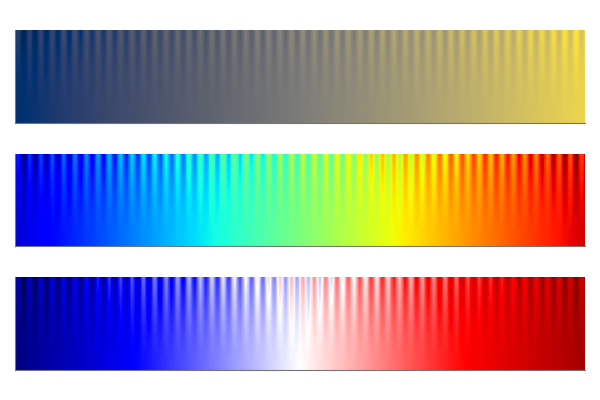

In [7]:
plt.figure(figsize=(6, 4))

plt.subplot(3, 1, 1)
plt.pcolormesh(x, y, vals, cmap="cividis")
plt.axis("image")
plt.xticks([])
plt.yticks([])

plt.subplot(3, 1, 2)
plt.pcolormesh(x, y, vals, cmap="jet")
plt.axis("image")
plt.xticks([])
plt.yticks([]);

plt.subplot(3, 1, 3)
plt.pcolormesh(x, y, vals, cmap="seismic")
plt.axis("image")
plt.xticks([])
plt.yticks([]);

plt.tight_layout()

### Mapas de colores cíciclos

In [12]:
t, r, vals = circle_sine_ramp()

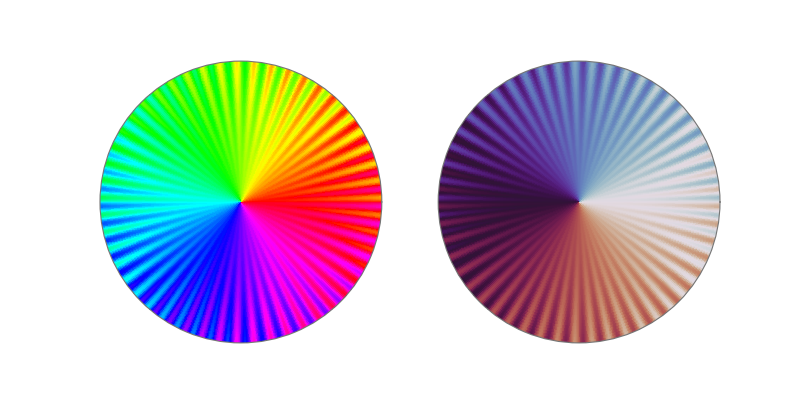

In [19]:
plt.figure(figsize=(8, 4))


ax0 = plt.subplot(121, projection="polar")
ax0.pcolormesh(t, r, vals, cmap="hsv")
ax0.set_xticks([])
ax0.set_yticks([]);


ax1 = plt.subplot(122, projection="polar")
ax1.pcolormesh(t, r, vals, cmap="twilight")
ax1.set_xticks([])
ax1.set_yticks([])

plt.show();

## Referencias

1. Ware, C., (1988). Color Sequences for Univariate Maps: Theory, Experiments and Principles. IEEE Computer Graphics and Applications. 8(5), 41-49.

2. Peter Kovesi (2015). Good Colour Maps: How to Design Them. arXiv:1509.03700.